## Homework 3 (10 points)

## HSE, 2020-21 academic year

### About the task

In this homework assignment, you will gain experience in data preparation and EDA (Exploratory Data Analysis), getting closer to real data work using tools you already know: numpy, pandas, matplotlib and seaborn.

You will be working with the task of credit scoring (assessing customer reliability). Data is provided on 1,000 clients, about whom about 20 signs are known and a positive or negative assessment as a loanee. These data will need to be prepared, examined (including with the help of visualization tools), and even try to propose some formula for a conditional assessment of customer reliability based on the data provided. Data description:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Each graph must be beautifully designed - this requires at least specifying its name, as well as noting what is depicted on each of the axes.
A short comment with conclusions is also expected for each schedule.

*Functions that can be useful when designing graphs: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [341]:
import pandas as pd

### Task 1 (0.0 points)

Use pandas tools to read the data file at the link https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Print the basic representation of the table (the first 5 and last 5 rows, size).

In [342]:
credits = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv')
credits.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [343]:
credits.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [344]:
credits.shape

(1000, 21)

### Task 2 (0.5 points)

Determine if there are gaps in the data. Divide the signs into quantitative, binary, ordinal, and categorical ones.

In [345]:
credits.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [346]:
credits['people_liable'].value_counts()

0 to 2       845
3 or more    155
Name: people_liable, dtype: int64

In [347]:
number_variables = ['duration', 'amount', 'age']
binary_variables = ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
ordinal_variables = ['savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits']
category_variables = ['status', 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors',
'property', 'other_installment_plans', 'housing', 'job']

### Task 3 (0.5 points)

Print the average loan amount (amount column) in each category (purpose column) using the groupby method.

In [348]:
credits.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Task 4 (0.5 points)


What percentage of clients are under 30 (age column) renting (housing column)? And what percentage of clients over the age of 40 rent a house?

In [349]:
print('Клиенты моложе 30 лет:', credits.loc[(credits['age'] < 30) & (credits['housing'] == 'rent')].shape[0] / credits.loc[credits['age'] < 30].shape[0])
print('Клиенты старше 40 лет:', credits.loc[(credits['age'] > 40) & (credits['housing'] == 'rent')].shape[0] / credits.loc[credits['age'] > 40].shape[0])

Клиенты моложе 30 лет: 0.6666666666666666
Клиенты старше 40 лет: 0.6801470588235294


### Task 5 (0.5 points)

 How many foreigners (foreign_worker) have more than 3 credits (number_credits)?

In [350]:
credits.loc[(credits['foreign_worker'] == 'yes') & ((credits['number_credits'] == '4-5')
              | (credits['number_credits'] == '>=6'))].shape[0]

1

### Task 6 (1 points)

In [351]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [352]:
from math import sin, pi
import numpy as np

Using numpy and matplotlib, let's start with a workout: plot the functions $sin(x)$ and $cos(x)$ from $-\pi$ to $\pi$ from 100 points with a legend and a grid. Use different colors for the lines, and let one of them be dotted. The result in this and the following charting tasks should look something like the picture. The content of the signatures does not necessarily have to match, but meaningful signatures must be present on the graphs.

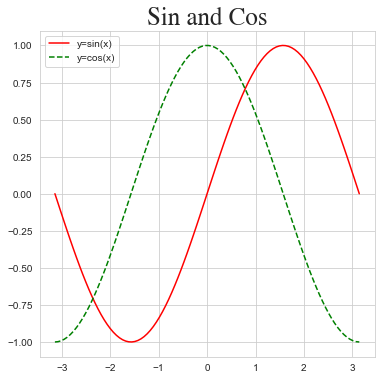

In [353]:
plt.figure(figsize=(6, 6))
plt.plot(np.linspace(-pi, pi, 100), np.sin(np.linspace(-pi, pi, 100)), linestyle = 'solid', color='r', label='y=sin(x)')
plt.plot(np.linspace(-pi, pi, 100), np.cos(np.linspace(-pi, pi, 100)), linestyle = 'dashed', color='g', label='y=cos(x)')
plt.title('Sin and Cos', fontsize = 25, fontname = 'Times')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### Task 7 (1 балл)

Let's consider the comparative number of positive and negative cases depending on the size of the current account. Build mirrored horizontal histograms.

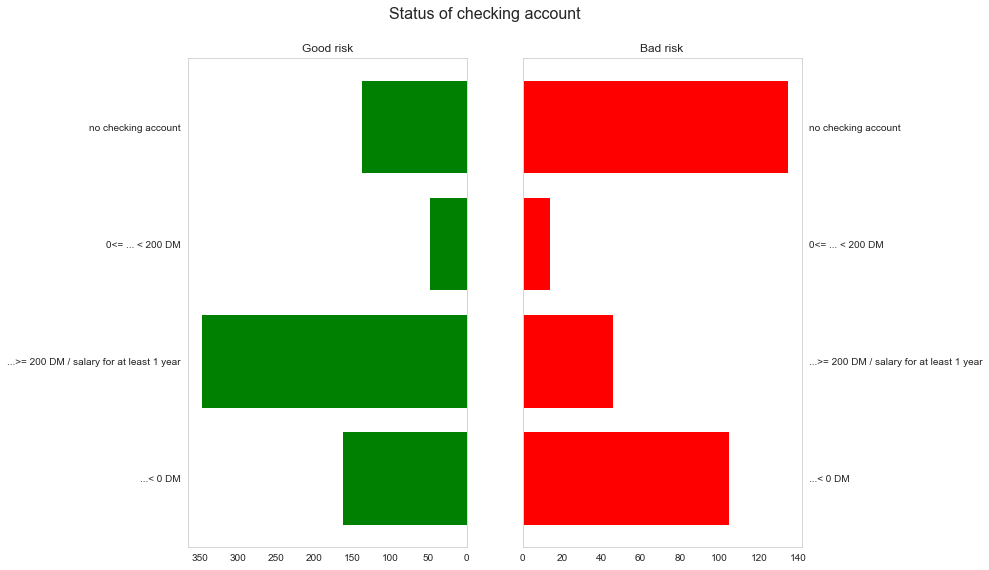

In [354]:
y = ['...< 0 DM', '...>= 200 DM / salary for at least 1 year', '0<= ... < 200 DM', 'no checking account']
bad = [105, 46, 14, 135]
good = [164, 348, 49, 139]
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(11, 9))
plt.figtext(.5,0.94,'Status of checking account', fontsize=16, ha='center')
axes[0].barh(y, good, align='center', color='g')
axes[0].set(title='Good risk')
axes[1].barh(y, bad, align='center', color='r')
axes[1].set(title='Bad risk')
axes[0].set(yticks=y, yticklabels=y)
axes[1].tick_params(axis='y', labelleft=False, labelright=True)
axes[0].invert_xaxis()

Thus, there are more people with high credit risk among those who do not have an account, as well as among those with "...< 0 DM"

Among the remaining ('...>= 200 DM / salary for at least 1 year' and '0<= ... < 200 DM') more people with low credit risk

### Task 8  (0.5 points)

In [355]:
import seaborn as sns

Now build a histogram to compare the number of positive and negative cases depending on the size of the savings account using seaborn. Which way do you prefer in terms of the complexity of writing code? And from the point of view of perception of the result?

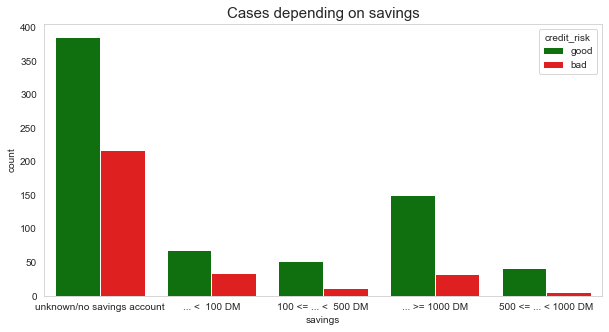

In [356]:
plt.figure(figsize=(10, 5))
colors = ['green', 'red']
sns.countplot(data=credits, x='savings', hue='credit_risk', palette=colors)
plt.title('Cases depending on savings', fontsize = 15);

We find that more people do not have a savings account; moreover, in general, according to this indicator, there are more people with low credit risk in each of the categories.

### Task 9  (1 point)

`seaborn` easily allows you to add even more information to a single chart. For each size of the savings account, we can estimate not only the number of positive and negative cases, but also their age distribution, for example. Build a visualization suitable for this.

Text(0.5, 1.0, 'Cases, age distribution')

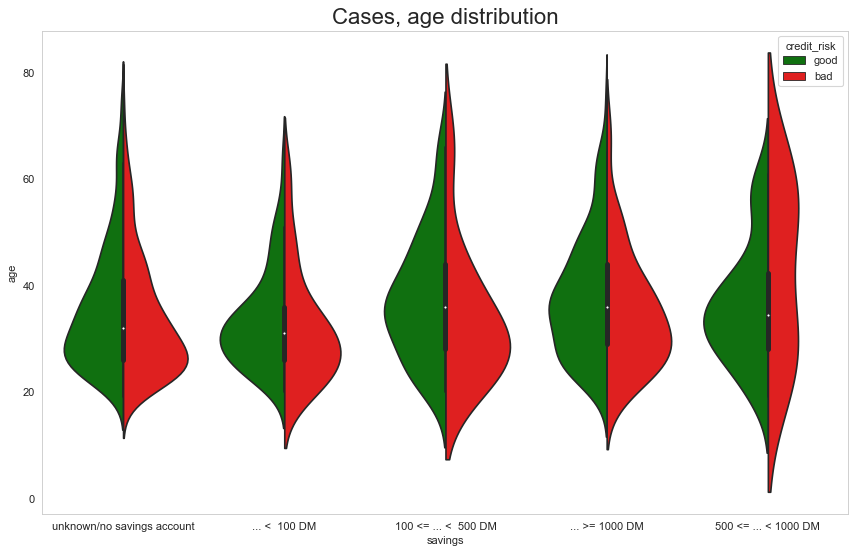

In [357]:
plt.figure(figsize=(13,8), dpi= 80)
colors = ['green', 'red']
sns.violinplot(x='savings', y='age', data=credits, hue='credit_risk', kind='violin', split=True, palette=colors)
plt.title('Cases, age distribution', fontsize=20)

Thus, among people with high credit risk, the majority of people aged 25-35 years in all categories except the last one, which means that borrowers of this age should be paid attention to the most. You should also be careful about giving loans to people in the latter category, as negative cases are most evenly distributed there. Among those with low credit risk, the most common people are middle-aged, that is, in the range of 30 to 40 years.

### Task 10  (0.5 points)

Finishing with the histograms, let's look at the distribution of positive and negative cases by age, placing them on top of each other. Let's add the distribution of all loans taken.

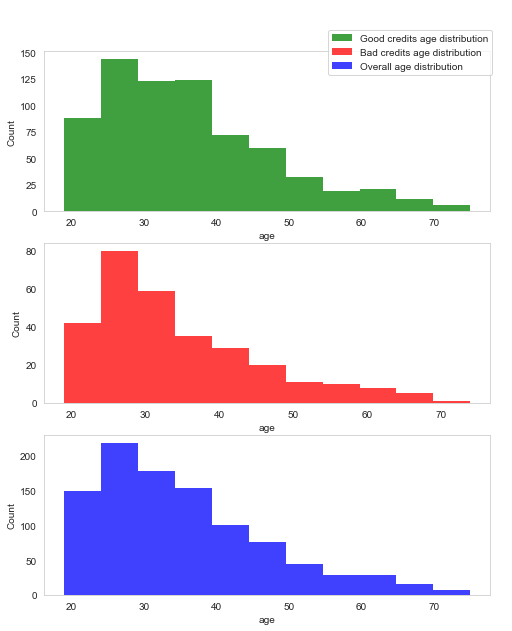

In [358]:
a = credits.loc[(credits['credit_risk'] == 'good')]
b = credits.loc[(credits['credit_risk'] == 'bad')]
c = credits
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharey=True)
fig.set_size_inches(8, 10)
plt.subplot(3, 1, 1)
sns.histplot(a['age'], bins=11, color='g', label='Good credits age distribution' , linewidth=0)
plt.subplot(3, 1, 2)
sns.histplot(b['age'], bins=11, color='r', label='Bad credits age distribution', linewidth=0)
plt.subplot(3, 1, 3)
sns.histplot(c['age'], bins=11, label='Overall age distribution', linewidth=0, color='b')

plt.figlegend(labels=('Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'), loc=(0.64, 0.88))

plt.show()

Thus, there are more positive cases than negative ones in all age categories, and the most common group of clients are people aged about 25 to 30 years.

### Task 11  (0.5 points)

A scattering diagram can sometimes be equally useful. Build such a diagram with the duration and size of credits as axes. Mark the positive and negative cases with different colors.

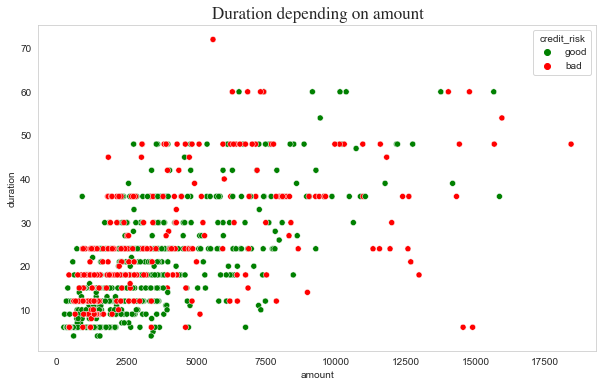

In [359]:
plt.figure(figsize=(10, 6))
colors = ['green', 'red']
sns.scatterplot(data=credits, x='amount', y='duration', hue='credit_risk', palette=colors)
plt.title('Duration depending on amount', fontsize=17, fontname='Times');

It can be seen that the largest proportion of negative cases is where the loan duration is approximately 16, 18 and 48 months. It can also be noted that short-term loans for small amounts are often not repaid, although the proportion of those paid is still higher. Loans for large amounts (more than 12,000, for example) they are paid less often than they are not paid.

### Task 12  (1 point)

Let's go deeper. Build a 3D version of the scatter plot by adding an axis with age.

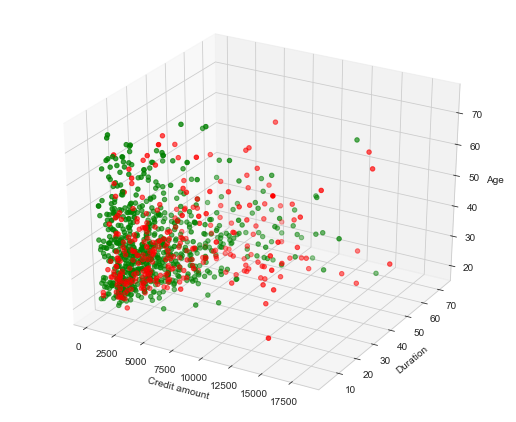

In [360]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(9,7.5))
colors = {'bad':'red', 'good':'green'}
ax = fig.add_subplot(111, projection='3d')
x = credits['amount']
y = credits['duration']
z = credits['age']

ax.scatter(x, y, z, c=credits['credit_risk'].apply(lambda x: colors[x]))
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

Again, we are convinced that most of the unpaid loans are assigned to young people. 

If the loan amount is large enough (for example, more than 12,000), then even older people tend not to repay it.

### Task 13  (0.5 points)

Represent all ordinal and binary features as numeric values {0, ..., n - 1}, where n is the number of feature values. Get rid of categorical features.

In [361]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

credits['people_liable'] = label.fit_transform(credits['people_liable'])
credits['telephone'] = label.fit_transform(credits['telephone'])
credits['foreign_worker'] = label.fit_transform(credits['foreign_worker'])
credits['credit_risk'] = label.fit_transform(credits['credit_risk'])
credits['savings'] = label.fit_transform(credits['savings'])
credits['employment_duration'] = label.fit_transform(credits['employment_duration'])
credits['installment_rate'] = label.fit_transform(credits['installment_rate'])
credits['present_residence'] = label.fit_transform(credits['present_residence'])
credits['number_credits'] = label.fit_transform(credits['number_credits'])

In [362]:
credits_new = pd.get_dummies(credits[['status', 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors',
'property', 'other_installment_plans', 'housing', 'job']])

In [363]:
credits.drop(['status', 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors',
'property', 'other_installment_plans', 'housing', 'job'], axis=1, inplace=True)

In [364]:
credits = pd.merge(credits, credits_new, left_index=True, right_index=True)

In [374]:
credits.columns

Index(['duration', 'amount', 'savings', 'employment_duration',
       'installment_rate', 'present_residence', 'age', 'number_credits',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk',
       'status_... < 0 DM',
       'status_... >= 200 DM / salary for at least 1 year',
       'status_0<= ... < 200 DM', 'status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/other credits elsewhere',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_furniture/equipment',
       'purpose_others', 'purpose_radio/television', 'purpose_repairs',
       'purpose_retraining', 'purpose_vacation',
       'personal_status_sex_female : non-single or male : s

### Task 14  (2 points)

Based on the results of the previous task, you should have a table in which all the signs are somehow represented by numerical values. Try to come up with some formula based on the data you have researched that connects the target variable with the features without using ready-made machine learning tools. If desired, you can exclude any other signs, or, conversely, create new ones based on existing ones. You may want to scale large sets of numerical values of some features using intervals. Goal: to implement a function that will take as input a set of features for a sample object and return a forecast of the target variable (0 or 1). For example, you can simply add up all the signs and return zero if the sum is negative, and one otherwise. But surely you can think of a better one!

The data has already been divided into a training set, which you can use as you like, and a test set, on which you will need to check your accuracy. Try to achieve an accuracy of at least 0.6.

In [366]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(credits[['duration', 'amount', 'age']])
credits[['duration', 'amount', 'age']] = scaled

In [369]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = credits.drop('credit_risk', 1).values
y = credits['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [375]:
def predict(Xtest: np.array) -> np.array:
    prediction = []
    for row in Xtest:
        a = (-0.1 * row[0] - 0.1 * row[1] - 0.1 * row[6] + 0.6 * row[2] + 0.8 * row[15] + 0.9 * row[13])
        prediction.append(a)
    for i in range(len(prediction)):
        if abs(1 - prediction[i]) < abs(0 - prediction[i]):
            prediction[i] = 1
        else:
            prediction[i] = 0
    prediction = np.array(prediction)
    return prediction

In [376]:
accuracy_score(y_train, predict(X_train))

0.6773333333333333

In [377]:
accuracy_score(y_test, predict(X_test))

0.62